In [573]:
#import required libraries
import pandas as pd 
import numpy as np
import warnings
from pandas import DataFrame 
warnings.filterwarnings("ignore") 
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split 
from datetime import datetime as dt
import matplotlib.pyplot as plt 



In [574]:
#read the dataset
df = pd.read_csv(r"C:\Users\ragha\OneDrive - SRH IT\Documents\parkinson detection\parkinsons.data",header=0)

In [575]:
# splitting dataset into train and test
x = df.drop(columns=['status','name'],axis=1)
y = df['status']
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=2)


In [576]:
# neural network
# defining the keras model

model = Sequential()
model.add(Dense(12, input_shape=(22,), activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(1, activation='sigmoid'))




In [577]:
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
start = dt.now()

In [578]:
# fit the keras model on the dataset
history= model.fit(X_train, Y_train, epochs=200, batch_size=10)
train_time = (dt.now() - start)

Epoch 1/87
14/14 [==============================] - 0s 11ms/step - loss: 34.7519 - accuracy: 0.2429 - val_loss: 21.5697 - val_accuracy: 0.3750
Epoch 2/87
14/14 [==============================] - 0s 3ms/step - loss: 25.1333 - accuracy: 0.2429 - val_loss: 14.8227 - val_accuracy: 0.3750
Epoch 3/87
14/14 [==============================] - 0s 3ms/step - loss: 16.5479 - accuracy: 0.2429 - val_loss: 8.0021 - val_accuracy: 0.3750
Epoch 4/87
14/14 [==============================] - 0s 3ms/step - loss: 7.5479 - accuracy: 0.2429 - val_loss: 1.0009 - val_accuracy: 0.6875
Epoch 5/87
14/14 [==============================] - 0s 3ms/step - loss: 2.1435 - accuracy: 0.6143 - val_loss: 2.6426 - val_accuracy: 0.6875
Epoch 6/87
14/14 [==============================] - 0s 3ms/step - loss: 1.5729 - accuracy: 0.7143 - val_loss: 1.4377 - val_accuracy: 0.6875
Epoch 7/87
14/14 [==============================] - 0s 3ms/step - loss: 0.9374 - accuracy: 0.6714 - val_loss: 0.4826 - val_accuracy: 0.8750
Epoch 8/87
14/

In [579]:
# evaluate the keras model
_, accuracy = model.evaluate(X_train, Y_train)
print('Accuracy: %.2f' % (accuracy*100))  
print('Time for training',train_time)

5/5 [==============================] - 0s 1ms/step - loss: 0.4943 - accuracy: 0.7692
Accuracy: 76.92
Time for training 0:00:03.672505


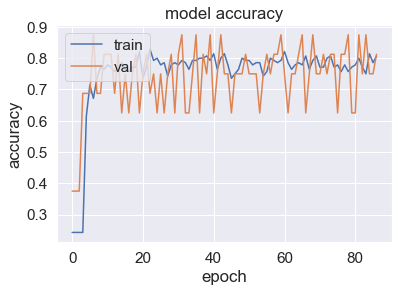

In [580]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

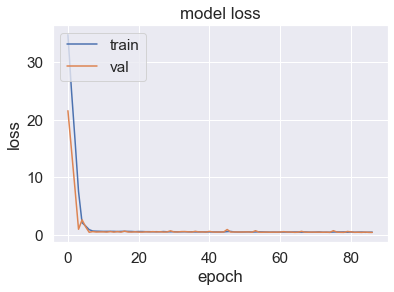

In [581]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()